Questo notebook è servito a preparare i dati per la visualizzazione sulla differenza per generi tra il gradimento del pubblico e dei critici.

In [35]:
import pandas as pd
import scipy.stats as st
import math
import numpy as np

In [36]:
df = pd.read_csv(r"C:\Users\giorgio1\Dropbox\Data Management\dataframes_grafici\medie_stdv_genere.csv")

In [37]:
df

,Unnamed: 0,genre,user_avg,user_stv,user_count,rotten_avg,rotten_stv,rotten_count,meta_avg,meta_stv,meta_count,stdv_diff_user_rot,stdv_diff_user_met
0,0,Action,3.56,1.00,7277231,2.99,0.95,26333,2.71,0.85,12348,0.70,0.78
1,1,Adult,3.14,1.06,9668,3.12,1.09,62,2.05,0.96,7,0.31,NaN
2,2,Adventure,3.58,1.01,6381286,3.09,0.96,22362,2.84,0.84,9441,0.66,0.75
3,3,Animation,3.57,1.02,1886932,3.08,0.99,6997,3.08,0.78,2010,0.67,0.78
4,4,Biography,3.55,1.00,3195017,2.91,1.00,11087,3.10,0.75,4231,0.78,0.78
5,5,Comedy,3.58,1.01,24225064,3.10,0.96,81959,2.78,0.85,29469,0.70,0.82
6,6,Crime,3.59,1.00,10462859,3.09,0.96,35344,2.84,0.83,14745,0.68,0.81
7,7,Documentary,3.48,1.04,3666953,3.07,1.02,13583,3.16,0.71,3642,0.73,0.73
8,8,Drama,3.59,1.00,35300064,3.09,0.96,117542,2.97,0.80,42052,0.69,0.80
9,9,Family,3.53,1.02,4036553,3.10,0.98,14610,2.89,0.83,5665,0.69,0.74


In [38]:
df['diff_rot'] = df['user_avg']-df['rotten_avg']

In [39]:
df['diff_meta'] = df['user_avg']-df['meta_avg']

In [40]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [41]:
df=df[df['genre']!='Adult']

In [42]:
df.to_csv(r"C:\Users\giorgio1\Dropbox\Data Management\dataframes_grafici\medie_stdv_genere.csv") #esporto il dataset modificato

# INTERVALLI DI CONFIDENZA

In [43]:
z = st.norm.ppf(.95)

In [44]:
rotten_var = df['rotten_stv']**2

In [45]:
user_var = df['user_stv']**2

In [46]:
df['estr_inf_rotten'] = df['user_avg']-df['rotten_avg'] - z * ((rotten_var/df['rotten_count'])+(user_var/df['user_count'])).apply(np.sqrt)

C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df['estr_inf_rotten']

0     0.560351
2     0.479420
3     0.470494
4     0.624352
5     0.474474
6     0.491585
7     0.395577
8     0.495386
9     0.416638
10    0.477720
11    0.656583
12    0.461374
13    0.539187
14    0.594566
15    0.372160
16    0.527937
17    0.493294
18    0.517946
19    0.838160
20    0.319933
21    0.502658
22    0.463816
23    0.498057
Name: estr_inf_rotten, dtype: float64

In [48]:
df['estr_sup_rotten'] = df['user_avg']-df['rotten_avg'] + z * ((rotten_var/df['rotten_count'])+(user_var/df['user_count'])).apply(np.sqrt)

C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df['estr_sup_rotten']

0     0.579649
2     0.500580
3     0.509506
4     0.655648
5     0.485526
6     0.508415
7     0.424423
8     0.504614
9     0.443362
10    0.502280
11    0.743417
12    0.498626
13    0.560813
14    0.625434
15    0.407840
16    0.552063
17    0.506706
18    0.542054
19    0.941840
20    0.360067
21    0.517342
22    0.496184
23    0.541943
Name: estr_sup_rotten, dtype: float64

In [50]:
meta_var = df['meta_stv']**2

In [51]:
df['estr_inf_meta'] = df['user_avg']-df['meta_avg'] - z * ((meta_var/df['meta_count'])+(user_var/df['user_count'])).apply(np.sqrt)

C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
df['estr_inf_meta']

0     0.837403
2     0.725765
3     0.461357
4     0.431012
5     0.791849
6     0.738745
7     0.300628
8     0.613577
9     0.621842
10    0.642956
11    0.519727
12    0.517078
13    0.951056
14    0.778153
15    0.559092
16    0.783438
17    0.670355
18    0.722486
19   -0.040653
20    0.564527
21    0.779729
22    0.536745
23    0.672990
Name: estr_inf_meta, dtype: float64

In [53]:
df['estr_sup_meta'] = df['user_avg']-df['meta_avg'] + z * ((meta_var/df['meta_count'])+(user_var/df['user_count'])).apply(np.sqrt)

C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
#df.to_csv("medie_stdv_genere_estremi.csv")

In [55]:
df.to_csv(r"C:\Users\giorgio1\Dropbox\Data Management\dataframes_grafici\medie_stdv_genere.csv")

In [ ]:
#genere, sito, valori, differenza, dev standard #comando melt di R


In [45]:
df1 = df[['genre','diff_rot','diff_meta','estr_inf_rotten','estr_sup_rotten','estr_inf_meta','estr_sup_meta']]

In [47]:
df1 = df1.T

In [50]:
df1.to_csv("prova_trasposto.csv")

In [51]:
df1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
genre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
diff_rot,0.57,0.02,0.49,0.49,0.64,0.48,0.5,0.41,0.5,0.43,...,0.61,0.39,0.54,0.5,0.53,0.89,0.34,0.51,0.48,0.52
diff_meta,0.85,1.09,0.74,0.49,0.45,0.8,0.75,0.32,0.62,0.64,...,0.8,0.59,0.8,0.68,0.74,0.08,0.59,0.79,0.56,0.71
estr_inf_rotten,0.560351,-0.208387,0.47942,0.470494,0.624352,0.474474,0.491585,0.395577,0.495386,0.416638,...,0.594566,0.37216,0.527937,0.493294,0.517946,0.83816,0.319933,0.502658,0.463816,0.498057
estr_sup_rotten,0.579649,0.248387,0.50058,0.509506,0.655648,0.485526,0.508415,0.424423,0.504614,0.443362,...,0.625434,0.40784,0.552063,0.506706,0.542054,0.94184,0.360067,0.517342,0.496184,0.541943
estr_inf_meta,0.837403,0.492908,0.725765,0.461357,0.431012,0.791849,0.738745,0.300628,0.613577,0.621842,...,0.778153,0.559092,0.783438,0.670355,0.722486,-0.040653,0.564527,0.779729,0.536745,0.67299
estr_sup_meta,0.862597,1.68709,0.754235,0.518643,0.468988,0.808151,0.761255,0.339372,0.626423,0.658158,...,0.821847,0.620908,0.816562,0.689645,0.757514,0.200653,0.615473,0.800271,0.583255,0.74701


In [52]:
df

,Unnamed: 0,genre,user_avg,user_stv,user_count,rotten_avg,rotten_stv,rotten_count,meta_avg,meta_stv,meta_count,diff_rot,diff_meta,estr_inf_rotten,estr_sup_rotten,estr_inf_meta,estr_sup_meta
0,0,Action,3.56,1.00,7277231,2.99,0.95,26333,2.71,0.85,12348,0.57,0.85,0.560351,0.579649,0.837403,0.862597
1,1,Adult,3.14,1.06,9668,3.12,1.09,62,2.05,0.96,7,0.02,1.09,-0.208387,0.248387,0.492908,1.687092
2,2,Adventure,3.58,1.01,6381286,3.09,0.96,22362,2.84,0.84,9441,0.49,0.74,0.479420,0.500580,0.725765,0.754235
3,3,Animation,3.57,1.02,1886932,3.08,0.99,6997,3.08,0.78,2010,0.49,0.49,0.470494,0.509506,0.461357,0.518643
4,4,Biography,3.55,1.00,3195017,2.91,1.00,11087,3.10,0.75,4231,0.64,0.45,0.624352,0.655648,0.431012,0.468988
5,5,Comedy,3.58,1.01,24225064,3.10,0.96,81959,2.78,0.85,29469,0.48,0.80,0.474474,0.485526,0.791849,0.808151
6,6,Crime,3.59,1.00,10462859,3.09,0.96,35344,2.84,0.83,14745,0.50,0.75,0.491585,0.508415,0.738745,0.761255
7,7,Documentary,3.48,1.04,3666953,3.07,1.02,13583,3.16,0.71,3642,0.41,0.32,0.395577,0.424423,0.300628,0.339372
8,8,Drama,3.59,1.00,35300064,3.09,0.96,117542,2.97,0.80,42052,0.50,0.62,0.495386,0.504614,0.613577,0.626423
9,9,Family,3.53,1.02,4036553,3.10,0.98,14610,2.89,0.83,5665,0.43,0.64,0.416638,0.443362,0.621842,0.658158


In [53]:
import matplotlib.pyplot as plt

In [129]:
#df3 = df[['estr_sup_rotten','estr_inf_rotten']]
#df4 = df[['estr_sup_meta','estr_inf_meta']]

In [137]:
#meta_ar = df4.values
#rot_ar = df3.values

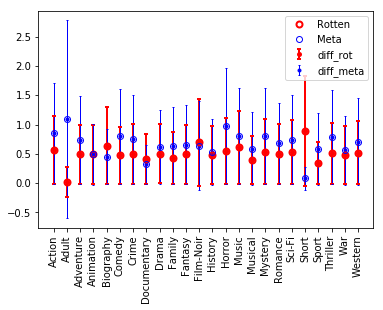

In [144]:
plt.errorbar(df['genre'],df['diff_rot'], yerr= df['estr_sup_rotten'].values, color="r", fmt='.', zorder=1, 
             capsize=2, elinewidth=2, markeredgewidth=2)
plt.errorbar(df['genre'],df['diff_meta'], yerr= df['estr_sup_meta'].values, color="b", fmt='.', zorder=1, 
             capsize=1, elinewidth=1, markeredgewidth=1)
plt.xticks(rotation=90, fontsize=10)
plt.plot(df['genre'],df['diff_rot'],'ro', mfc='none', label='Rotten', markeredgewidth=2)
plt.plot(df['genre'],df['diff_meta'],'bo', mfc='none', label='Meta')
plt.legend(numpoints=1)
plt.show() 